# Fateme Fouladi

# HomeWork2_3

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
df=pd.read_csv('ML_HW2\car details v4.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [315]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

# Q1

splitting test and train data based on price categories

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Categorize Prices and defining price bins based on train_dataset.describe and distribution of car prices

bins = [2000, 1700000, 5000000, 10000000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Encode Categories
label_encoder = LabelEncoder()
df['encoded_category'] = label_encoder.fit_transform(df['price_category'])

# Split Data with Stratification
X = df.drop(['Price', 'encoded_category'], axis=1)
y=df['Price']
strat = df['encoded_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110, stratify=strat)

In [318]:
train_dataset=pd.concat([X_train, y_train], axis=1)
test_dataset=pd.concat([X_test, y_test], axis=1)

In [319]:
train_dataset.shape

(1647, 21)

# Q2

EDA

In [320]:
# Sum of missing values
train_dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 60
Max Power              60
Max Torque             60
Drivetrain            106
Length                 48
Width                  48
Height                 48
Seating Capacity       48
Fuel Tank Capacity     90
price_category          0
Price                   0
dtype: int64

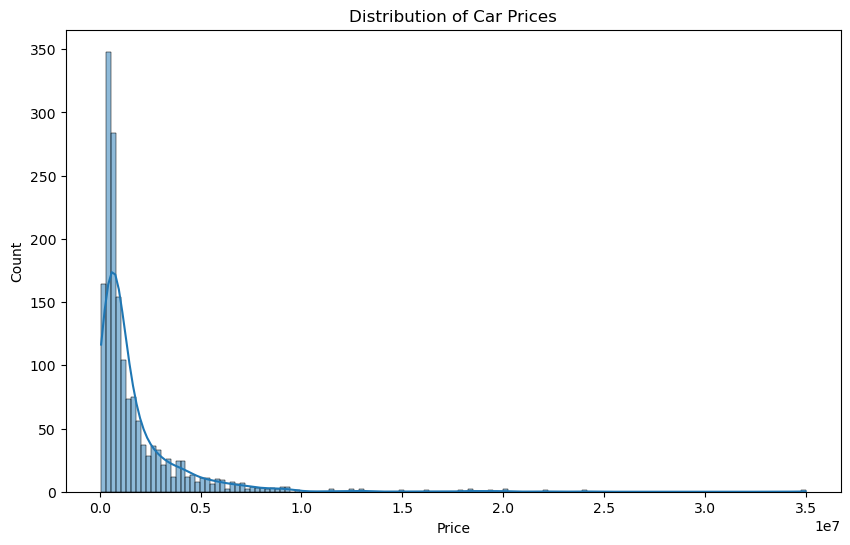

In [321]:
# Distribution of Price feature
plt.figure(figsize=(10,6))
sns.histplot(train_dataset['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

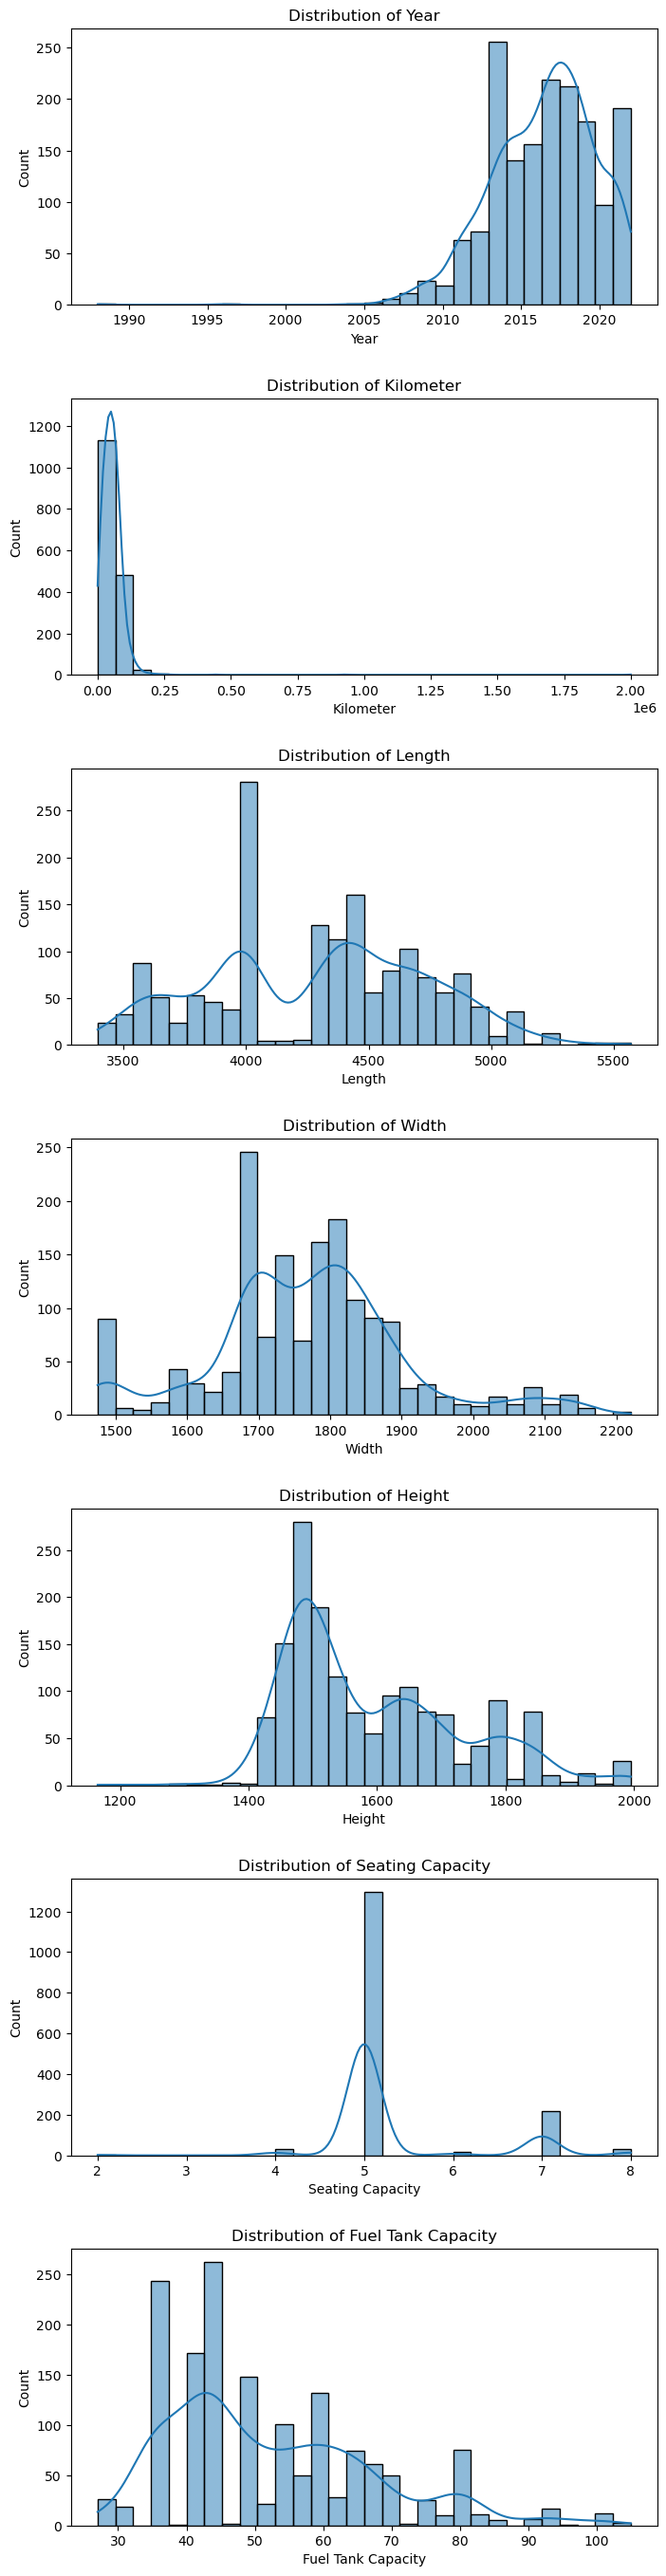

In [322]:
# Distribution of other features (numerical features)

numerical_features = ['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

# subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 4 * len(numerical_features)))
fig.tight_layout(pad=5.0)

# histplots for numerical features
for i, feature in enumerate(numerical_features):
    sns.histplot(train_dataset[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.show()

We can convert 'Engine', 'Max Power' and 'Max Torque' features to numerical features and plot their histograms too.

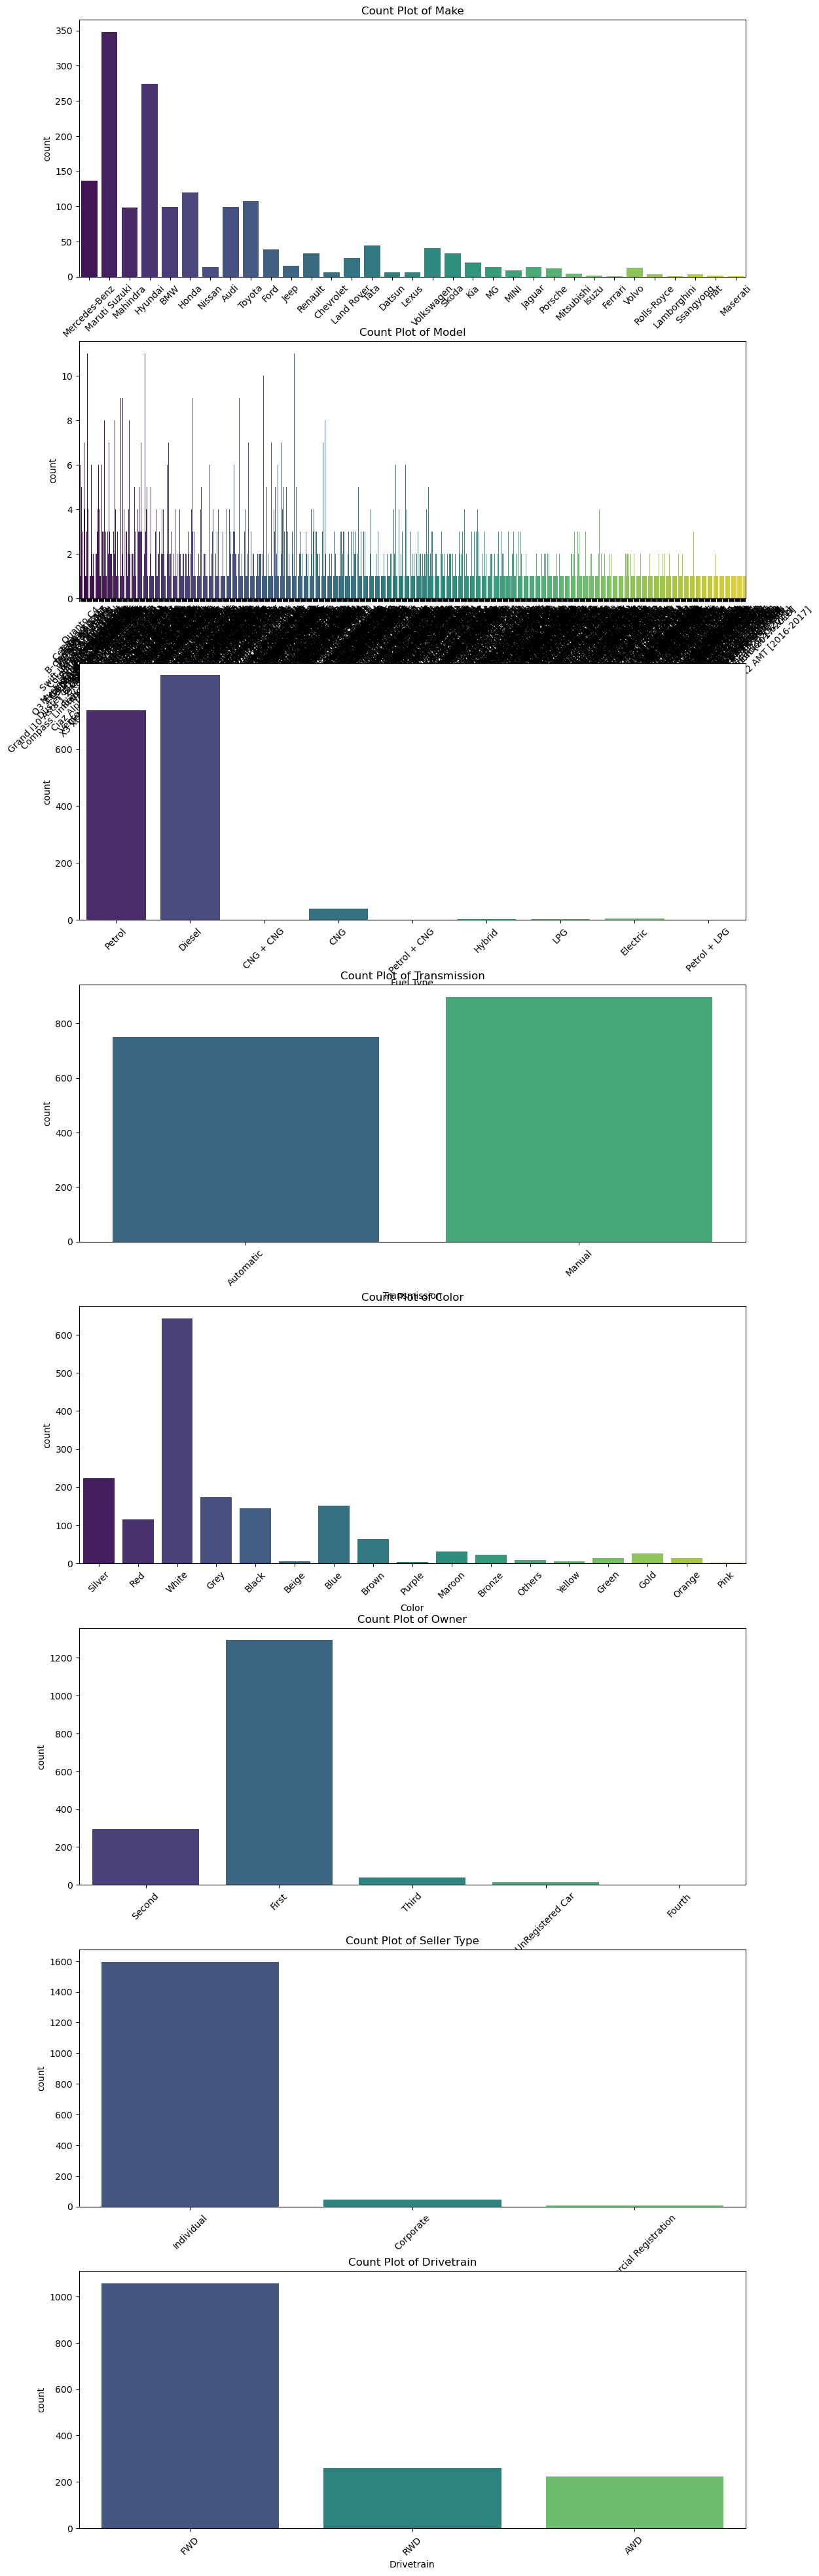

In [323]:
# Countplot of categorical features

categorical_features = ['Make', 'Model', 'Fuel Type', 'Transmission' , 'Color', 'Owner', 'Seller Type', 'Drivetrain']
# subplots
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(12, 5 * len(categorical_features)))
fig.tight_layout(pad=5.0)

# count plots for categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=train_dataset, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

In [324]:
unique_values_Model = train_dataset['Model'].nunique()
print('number of uniqe values for "Model":', unique_values_Model)


number of uniqe values for "Model": 906


so it seems "Model" is not an important feature for modeling and we can drop it.

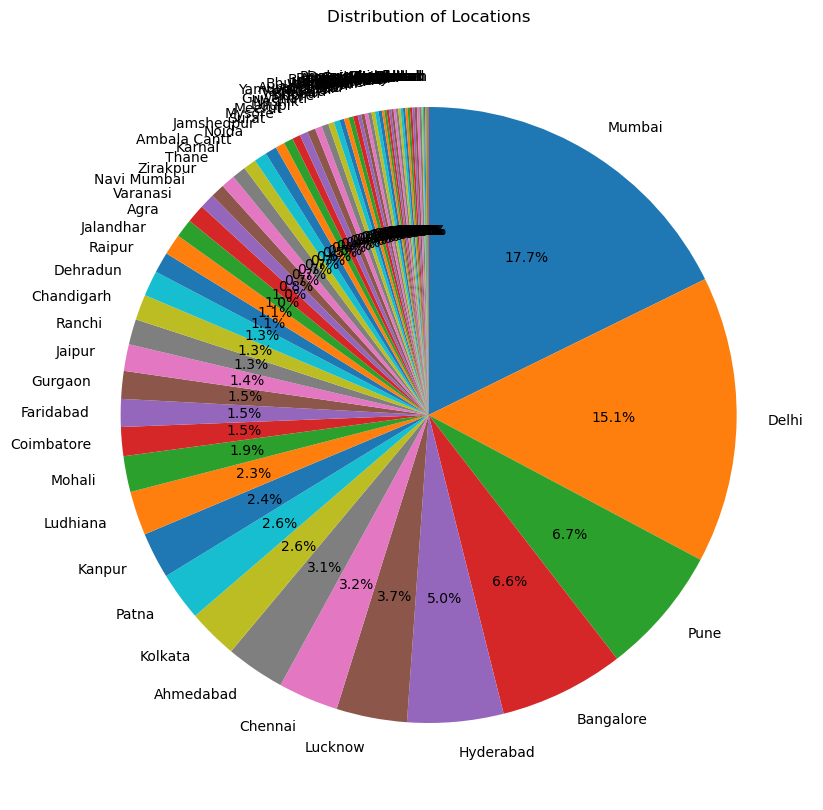

In [325]:
# pie chart for distribution of locations
location_counts = train_dataset['Location'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Locations')
plt.show()

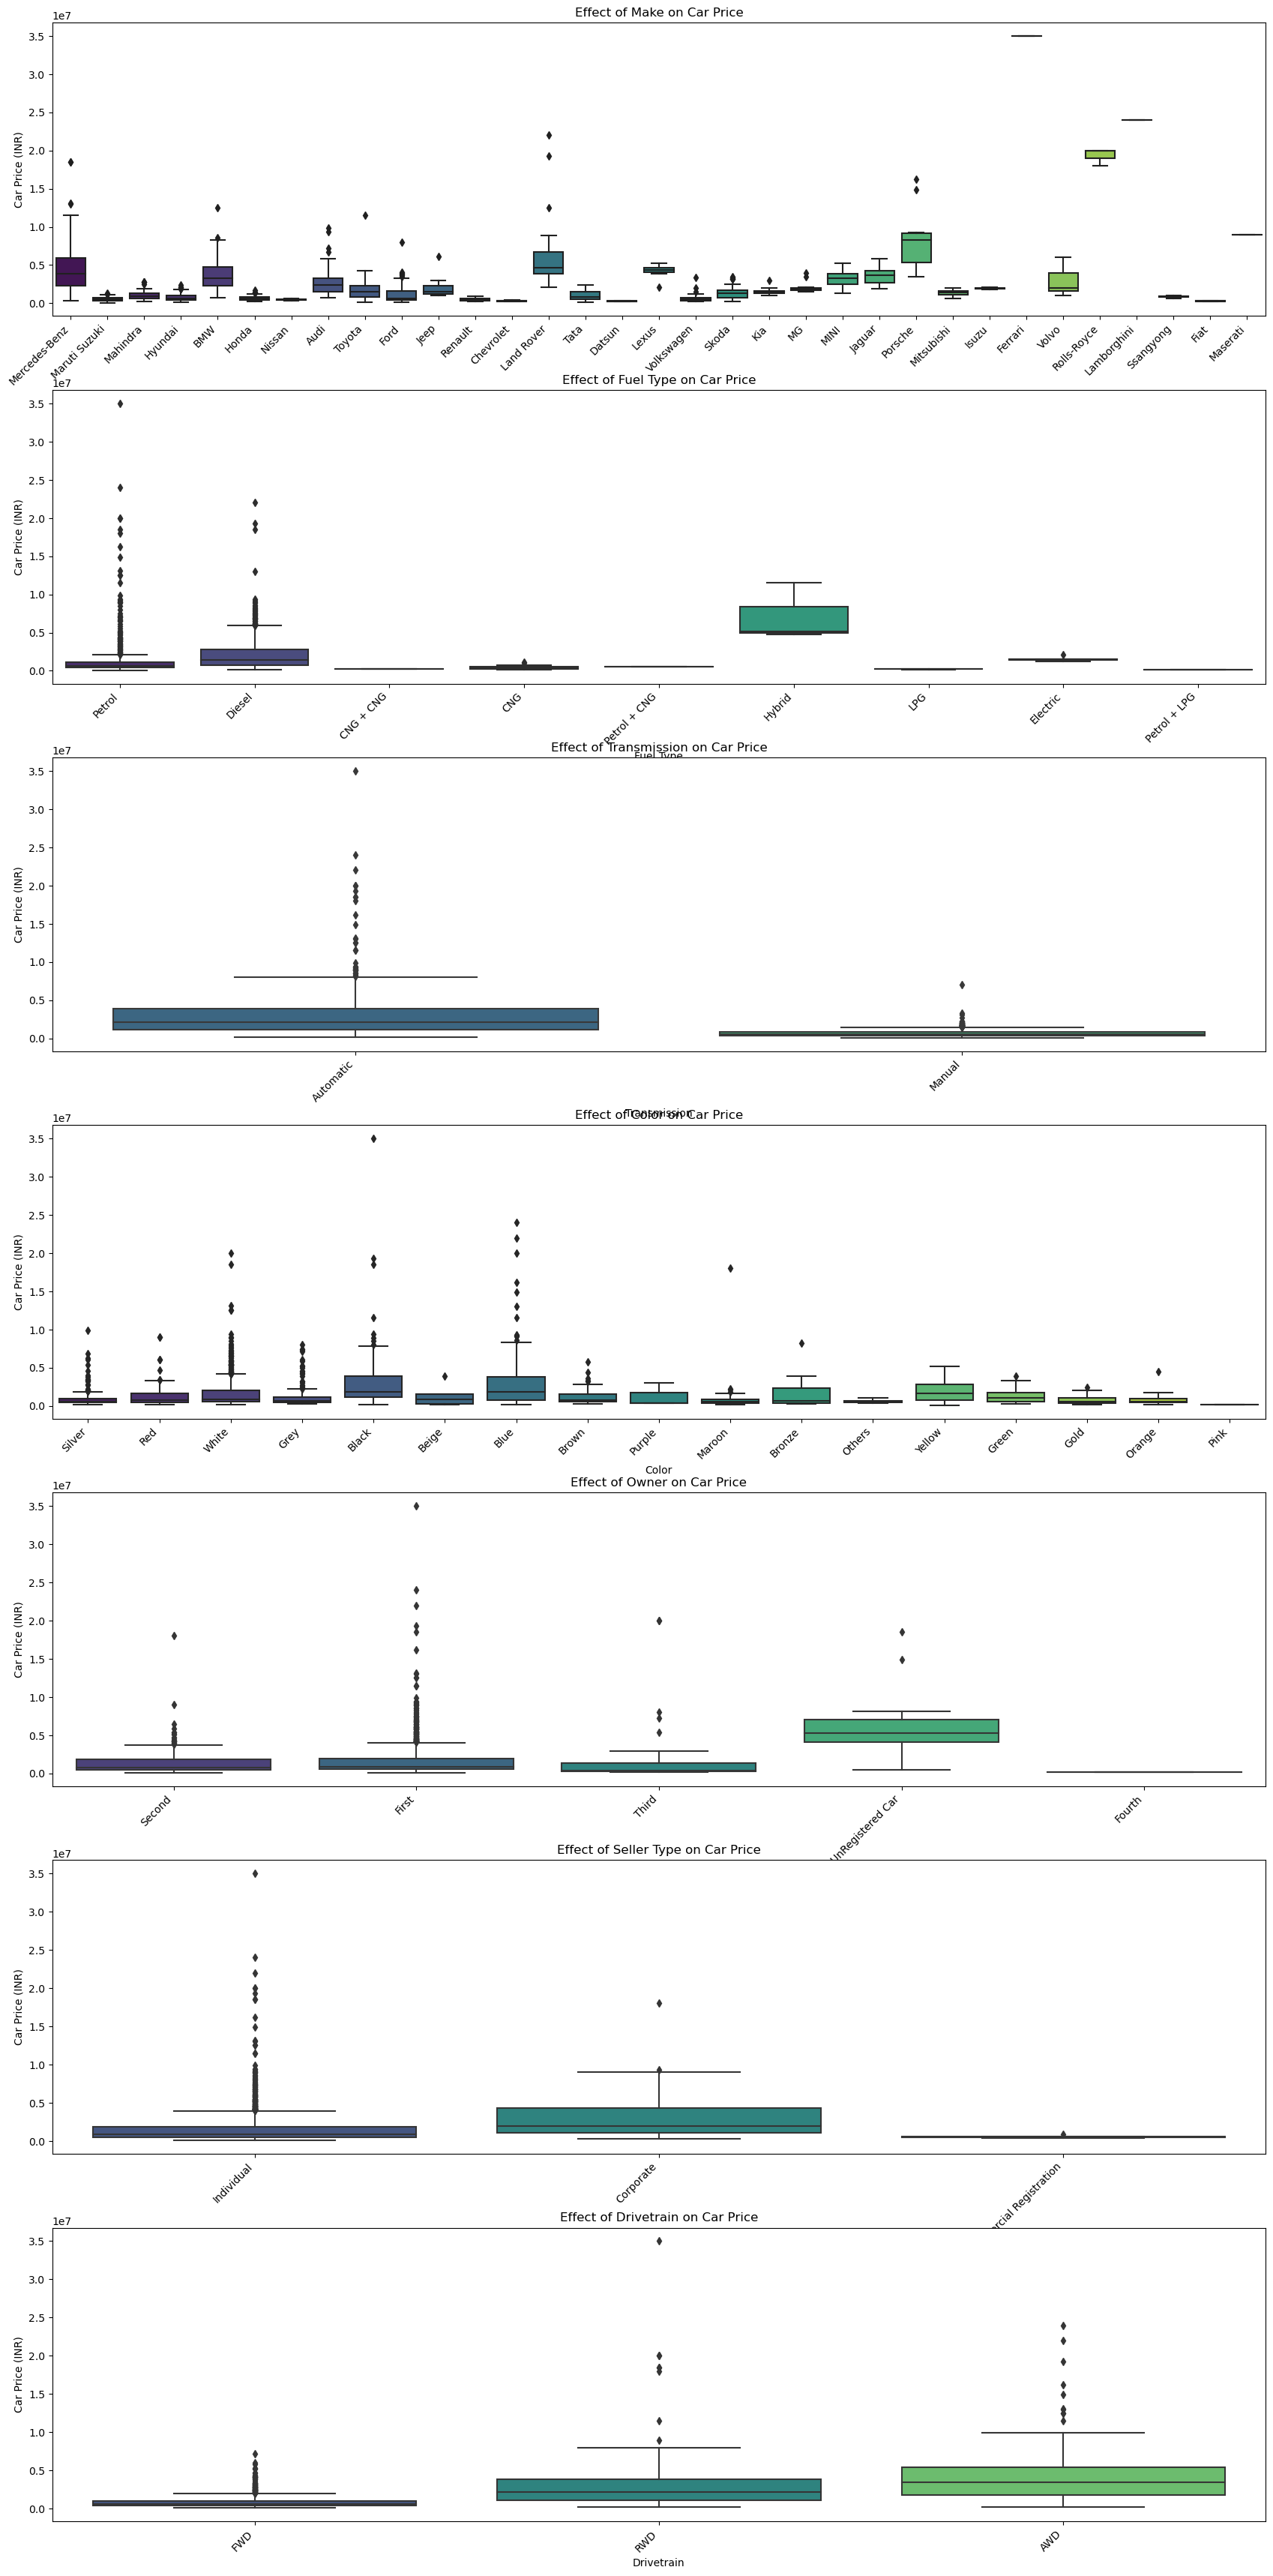

In [326]:
# Effect of different features on car price(using boxplot)

features_to_explore = ['Make', 'Fuel Type', 'Transmission', 'Color', 'Owner', 'Seller Type', 'Drivetrain']

# subplots
fig, axes = plt.subplots(nrows=len(features_to_explore), ncols=1, figsize=(18, 5 * len(features_to_explore)))
fig.tight_layout(pad=5.0)

# boxplots for each feature
for i, feature in enumerate(features_to_explore):
    sns.boxplot(x=feature, y='Price', data=train_dataset, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Effect of {feature} on Car Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Car Price (INR)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.show()

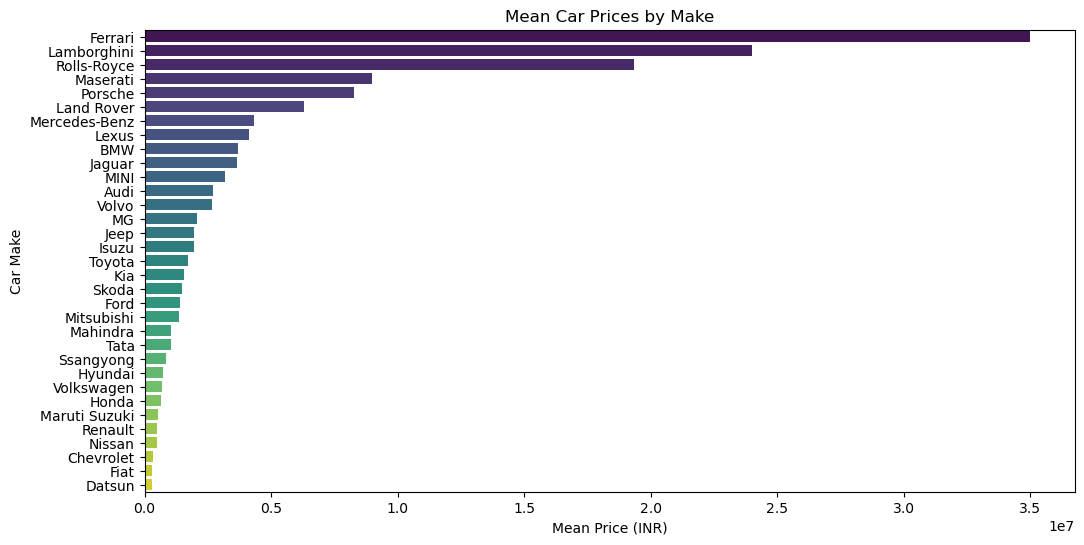

In [327]:
# The mean prices of each brand

mean_prices_by_make = train_dataset.groupby('Make')['Price'].mean().reset_index()
mean_prices_by_make = mean_prices_by_make.sort_values(by='Price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Make', data=mean_prices_by_make, palette='viridis')
plt.title('Mean Car Prices by Make')
plt.xlabel('Mean Price (INR)')
plt.ylabel('Car Make')
plt.show()

# Q3

Missing Value handling

In [328]:
train_dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 60
Max Power              60
Max Torque             60
Drivetrain            106
Length                 48
Width                  48
Height                 48
Seating Capacity       48
Fuel Tank Capacity     90
price_category          0
Price                   0
dtype: int64

In [329]:
nan_percentage = (train_dataset.isnull().mean() * 100).sort_values(ascending=False)
nan_percentage

Drivetrain            6.435944
Fuel Tank Capacity    5.464481
Engine                3.642987
Max Power             3.642987
Max Torque            3.642987
Seating Capacity      2.914390
Height                2.914390
Width                 2.914390
Length                2.914390
price_category        0.000000
Make                  0.000000
Model                 0.000000
Seller Type           0.000000
Owner                 0.000000
Color                 0.000000
Location              0.000000
Transmission          0.000000
Fuel Type             0.000000
Kilometer             0.000000
Year                  0.000000
Price                 0.000000
dtype: float64

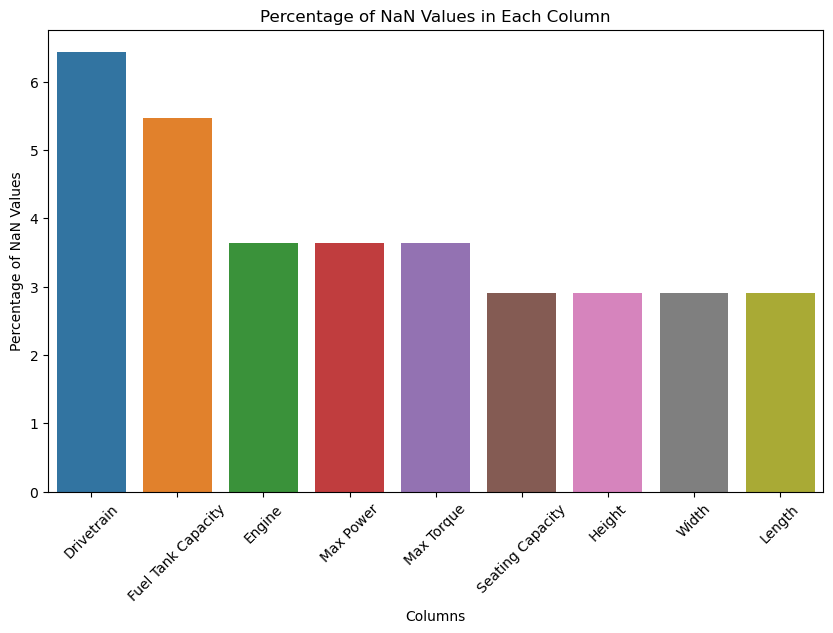

In [330]:
# Plotting the percentage of NaN values
nan_percentage = nan_percentage[nan_percentage > 0]
plt.figure(figsize=(10, 6))
sns.barplot(x=nan_percentage.index, y=nan_percentage.values)
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=45)
plt.show()

In [331]:
train_dataset[train_dataset['Engine'].isnull()]

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,price_category,Price
266,BMW,3-Series 320d,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,800000
69,Audi,A4 2.0 TDI (143 bhp),2012,50000,Diesel,Automatic,Mumbai,White,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,1250000
477,Mercedes-Benz,S-Class 300,2012,158000,Petrol,Automatic,Chennai,Brown,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,1500000
487,Maruti Suzuki,Zen LXi BS-II,2004,65082,Petrol,Manual,Kolkata,Yellow,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,71001
571,Volkswagen,Vento Highline Petrol AT,2011,50667,Petrol,Automatic,Mumbai,White,Second,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,345000
1928,Porsche,Cayenne 3.2 V6 Petrol,2014,43000,Petrol,Automatic,Mumbai,White,Second,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,3600000
904,Volkswagen,Jetta 1.9L TDI,2009,107879,Diesel,Manual,Pune,White,Second,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,310000
727,Jaguar,XF 3.0 V6 Premium Luxury,2015,62645,Diesel,Automatic,Hyderabad,Bronze,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2650000
648,Volkswagen,Polo Comfortline 1.2L (D),2012,78000,Diesel,Manual,Raipur,Grey,Third,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,375000
604,Skoda,Kodiaq L&K 2.0 TDI 4x4 AT,2020,47000,Diesel,Automatic,Mumbai,White,First,Individual,...,NaN,NaN,NaN,4697.0,1882.0,1665.0,7.0,63.0,Medium,3499000


In [332]:
train_dataset[train_dataset['Length'].isnull()]

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,price_category,Price
266,BMW,3-Series 320d,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,800000
69,Audi,A4 2.0 TDI (143 bhp),2012,50000,Diesel,Automatic,Mumbai,White,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,1250000
477,Mercedes-Benz,S-Class 300,2012,158000,Petrol,Automatic,Chennai,Brown,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,1500000
487,Maruti Suzuki,Zen LXi BS-II,2004,65082,Petrol,Manual,Kolkata,Yellow,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,71001
571,Volkswagen,Vento Highline Petrol AT,2011,50667,Petrol,Automatic,Mumbai,White,Second,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,345000
1928,Porsche,Cayenne 3.2 V6 Petrol,2014,43000,Petrol,Automatic,Mumbai,White,Second,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,3600000
904,Volkswagen,Jetta 1.9L TDI,2009,107879,Diesel,Manual,Pune,White,Second,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,310000
727,Jaguar,XF 3.0 V6 Premium Luxury,2015,62645,Diesel,Automatic,Hyderabad,Bronze,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2650000
648,Volkswagen,Polo Comfortline 1.2L (D),2012,78000,Diesel,Manual,Raipur,Grey,Third,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,375000
33,Honda,CR-V 2.4 AT,2013,67000,Petrol,Automatic,Mumbai,Brown,First,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,860000


We can see that in the rows that 'Engine' datas are missed, most of the 'Max Power' and 'Max Torque' datas are missed too. And the same thing happens for 'Length' , 'Width' and 'Height' and 'Seating Capacity'.

First we need to convert "Engine" , "Max Power" and "Max Torque" to numerical data.

In [333]:
# Split the 'Max Power' and 'Max Torque' by '@' and creat 2 columns for each of them

# 'Max Power'
train_dataset[['Max Power(BHP)', 'Max Power(RPM)']] = train_dataset['Max Power'].str.split('@', expand=True)
# Strip whitespaces
train_dataset['Max Power(BHP)'] = train_dataset['Max Power(BHP)'].str.strip()
train_dataset['Max Power(RPM)'] = train_dataset['Max Power(RPM)'].str.strip()

# 'Max Torque'
train_dataset[['Max Torque(Nm)', 'Max Torque(RPM)']] = train_dataset['Max Torque'].str.split('@', expand=True)
# Strip whitespaces
train_dataset['Max Torque(Nm)'] = train_dataset['Max Torque(Nm)'].str.strip()
train_dataset['Max Torque(RPM)'] = train_dataset['Max Torque(RPM)'].str.strip()

# Delete 'Max Power' and 'Max Torque' columns
train_dataset.drop('Max Power',axis=1, inplace=True)
train_dataset.drop('Max Torque',axis=1, inplace=True)

train_dataset.head()

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Width,Height,Seating Capacity,Fuel Tank Capacity,price_category,Price,Max Power(BHP),Max Power(RPM),Max Torque(Nm),Max Torque(RPM)
1905,Mercedes-Benz,B-class B180 Sports,2013,52000,Petrol,Automatic,Delhi,Silver,Second,Individual,...,2010.0,1557.0,5.0,50.0,Low,1150000,120 bhp,5000 rpm,200 Nm,1250 rpm
1716,Maruti Suzuki,Celerio VXi AMT,2014,19000,Petrol,Automatic,Mumbai,Silver,Second,Individual,...,1600.0,1560.0,5.0,35.0,Low,345000,67 bhp,6000 rpm,90 Nm,3500 rpm
1796,Mahindra,Quanto C4,2013,60000,Diesel,Manual,Kolkata,Red,First,Individual,...,1850.0,1880.0,7.0,55.0,Low,249000,100 bhp,3750 rpm,240 Nm,1600 rpm
953,Hyundai,Grand i10 Asta 1.2 Kappa VTVT [2013-2016],2021,18105,Petrol,Manual,Bangalore,Silver,First,Individual,...,1660.0,1520.0,5.0,43.0,Low,765000,81 bhp,6000 rpm,114 Nm,4000 rpm
349,Maruti Suzuki,Swift Lxi (O) [2014-2017],2016,45000,Petrol,Manual,Delhi,White,First,Individual,...,1695.0,1530.0,5.0,42.0,Low,450000,83 bhp,6000 rpm,115 Nm,4000 rpm


In [334]:
# Defining a function to remove strings from data and convert it to numeric values 

import math
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if pd.isna(x) or x == '':
        return float('nan')
    if 'bhp' in x:
        return float(x.replace('bhp', '')) 
    if 'rpm' in x:
        return float(x.replace('rpm', ''))    
    if 'Nm' in x:
        return float(x.replace('Nm', ''))
    if 'cc' in x:
        return float(x.replace('cc', ''))      
    return float(x)

train_dataset['Max Power(BHP)'] = train_dataset['Max Power(BHP)'].apply(value_to_float)
train_dataset['Max Power(RPM)'] = train_dataset['Max Power(RPM)'].apply(value_to_float)
train_dataset['Max Torque(Nm)'] = train_dataset['Max Torque(Nm)'].apply(value_to_float)
train_dataset['Max Torque(RPM)'] = train_dataset['Max Torque(RPM)'].apply(value_to_float)
train_dataset['Engine'] = train_dataset['Engine'].apply(value_to_float)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 1905 to 1473
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Make                1647 non-null   object  
 1   Model               1647 non-null   object  
 2   Year                1647 non-null   int64   
 3   Kilometer           1647 non-null   int64   
 4   Fuel Type           1647 non-null   object  
 5   Transmission        1647 non-null   object  
 6   Location            1647 non-null   object  
 7   Color               1647 non-null   object  
 8   Owner               1647 non-null   object  
 9   Seller Type         1647 non-null   object  
 10  Engine              1587 non-null   float64 
 11  Drivetrain          1541 non-null   object  
 12  Length              1599 non-null   float64 
 13  Width               1599 non-null   float64 
 14  Height              1599 non-null   float64 
 15  Seating Capacity    1599 non-null   floa

We plot the distribution of our features to realize that we should use mean or median for filling missing values.

If our data is normally distributed or nearly normal using "mean" is a better choice, otherwise "median" works better.

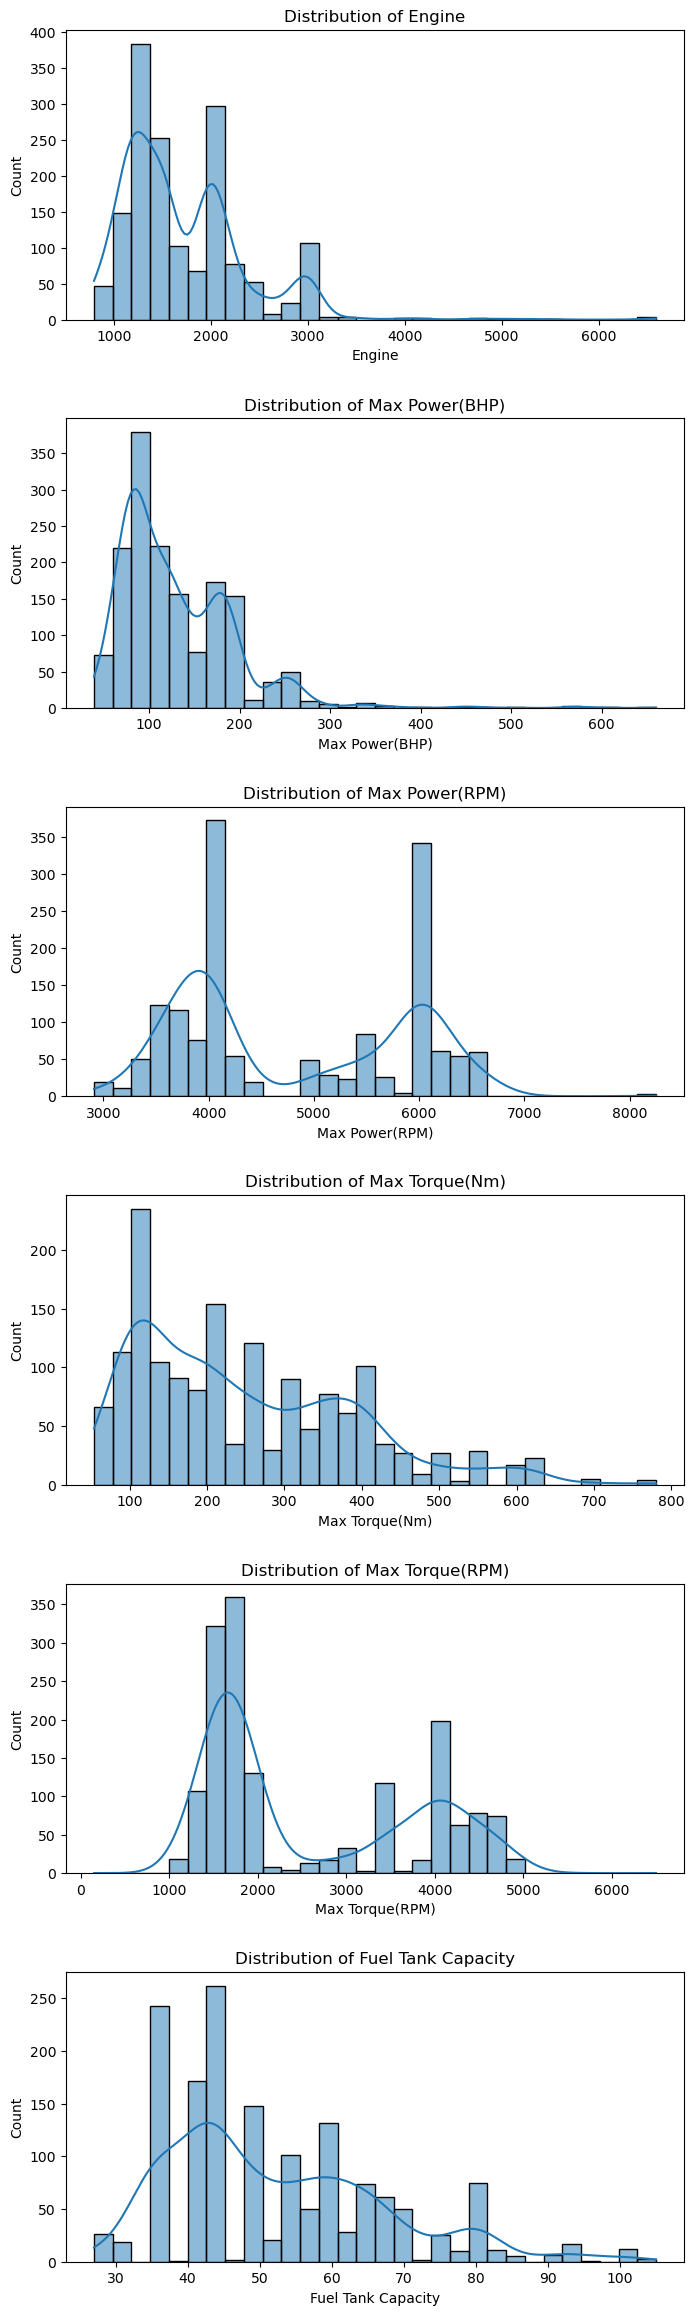

In [335]:
# Distribution of Engine, Max Power and Max Torque and Fuel Tank Capacity

numerical_features = ['Engine', 'Max Power(BHP)', 'Max Power(RPM)', 'Max Torque(Nm)', 'Max Torque(RPM)', 'Fuel Tank Capacity']

# subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 4 * len(numerical_features)))
fig.tight_layout(pad=5.0)

# histplots 
for i, feature in enumerate(numerical_features):
    sns.histplot(train_dataset[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')


plt.show()

So i decide to use "median" for filling them.

Filling NaNs:

I use group-wise median imputation to fill missing values, that impute one column's missing values with the median median value calculated for each group,
which can be more representative than using a global median for the entire column.
e.g. we imputate missing values in the 'Engine' column based on the 'Drivetrain' and 'Transmission' columns. 

In [336]:
train_dataset['Engine'] = train_dataset['Engine'].fillna(train_dataset.groupby(['Drivetrain', 'Transmission'])['Engine'].transform('median'))
train_dataset['Max Power(BHP)'] = train_dataset['Max Power(BHP)'].fillna(train_dataset.groupby(['Drivetrain', 'Transmission'])['Max Power(BHP)'].transform('median'))
train_dataset['Max Power(RPM)'] = train_dataset['Max Power(RPM)'].fillna(train_dataset.groupby(['Drivetrain', 'Transmission'])['Max Power(RPM)'].transform('median'))
train_dataset['Max Torque(Nm)'] = train_dataset['Max Torque(Nm)'].fillna(train_dataset.groupby(['Drivetrain', 'Transmission'])['Max Torque(Nm)'].transform('median'))
train_dataset['Max Torque(RPM)'] = train_dataset['Max Torque(RPM)'].fillna(train_dataset.groupby(['Drivetrain', 'Transmission'])['Max Torque(RPM)'].transform('median'))
train_dataset['Fuel Tank Capacity'] = train_dataset['Fuel Tank Capacity'].fillna(train_dataset.groupby(['Drivetrain', 'Transmission'])['Fuel Tank Capacity'].transform('median'))

In [337]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 55
Drivetrain            106
Length                 48
Width                  48
Height                 48
Seating Capacity       48
Fuel Tank Capacity     48
price_category          0
Price                   0
Max Power(BHP)         55
Max Power(RPM)         57
Max Torque(Nm)         55
Max Torque(RPM)        55
dtype: int64

In [338]:
train_dataset['Engine'] = train_dataset['Engine'].fillna(train_dataset.groupby(['Fuel Type','Year'])['Engine'].transform('median'))
train_dataset['Max Power(BHP)'] = train_dataset['Max Power(BHP)'].fillna(train_dataset.groupby(['Fuel Type','Year'])['Max Power(BHP)'].transform('median'))
train_dataset['Max Power(RPM)'] = train_dataset['Max Power(RPM)'].fillna(train_dataset.groupby(['Fuel Type','Year'])['Max Power(RPM)'].transform('median'))
train_dataset['Max Torque(Nm)'] = train_dataset['Max Torque(Nm)'].fillna(train_dataset.groupby(['Fuel Type','Year'])['Max Torque(Nm)'].transform('median'))
train_dataset['Max Torque(RPM)'] = train_dataset['Max Torque(RPM)'].fillna(train_dataset.groupby(['Fuel Type','Year'])['Max Torque(RPM)'].transform('median'))
train_dataset['Fuel Tank Capacity'] = train_dataset['Fuel Tank Capacity'].fillna(train_dataset.groupby(['Fuel Type','Year'])['Fuel Tank Capacity'].transform('median'))

In [339]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  2
Drivetrain            106
Length                 48
Width                  48
Height                 48
Seating Capacity       48
Fuel Tank Capacity      2
price_category          0
Price                   0
Max Power(BHP)          2
Max Power(RPM)          2
Max Torque(Nm)          2
Max Torque(RPM)         2
dtype: int64

In [340]:
train_dataset['Engine'] = train_dataset['Engine'].fillna(train_dataset.groupby(['Transmission','price_category'])['Engine'].transform('median'))
train_dataset['Max Power(BHP)'] = train_dataset['Max Power(BHP)'].fillna(train_dataset.groupby(['Transmission','price_category'])['Max Power(BHP)'].transform('median'))
train_dataset['Max Power(RPM)'] = train_dataset['Max Power(RPM)'].fillna(train_dataset.groupby(['Transmission','price_category'])['Max Power(RPM)'].transform('median'))
train_dataset['Max Torque(Nm)'] = train_dataset['Max Torque(Nm)'].fillna(train_dataset.groupby(['Transmission','price_category'])['Max Torque(Nm)'].transform('median'))
train_dataset['Max Torque(RPM)'] = train_dataset['Max Torque(RPM)'].fillna(train_dataset.groupby(['Transmission','price_category'])['Max Torque(RPM)'].transform('median'))
train_dataset['Fuel Tank Capacity'] = train_dataset['Fuel Tank Capacity'].fillna(train_dataset.groupby(['Transmission','price_category'])['Fuel Tank Capacity'].transform('median'))

In [341]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain            106
Length                 48
Width                  48
Height                 48
Seating Capacity       48
Fuel Tank Capacity      0
price_category          0
Price                   0
Max Power(BHP)          0
Max Power(RPM)          0
Max Torque(Nm)          0
Max Torque(RPM)         0
dtype: int64

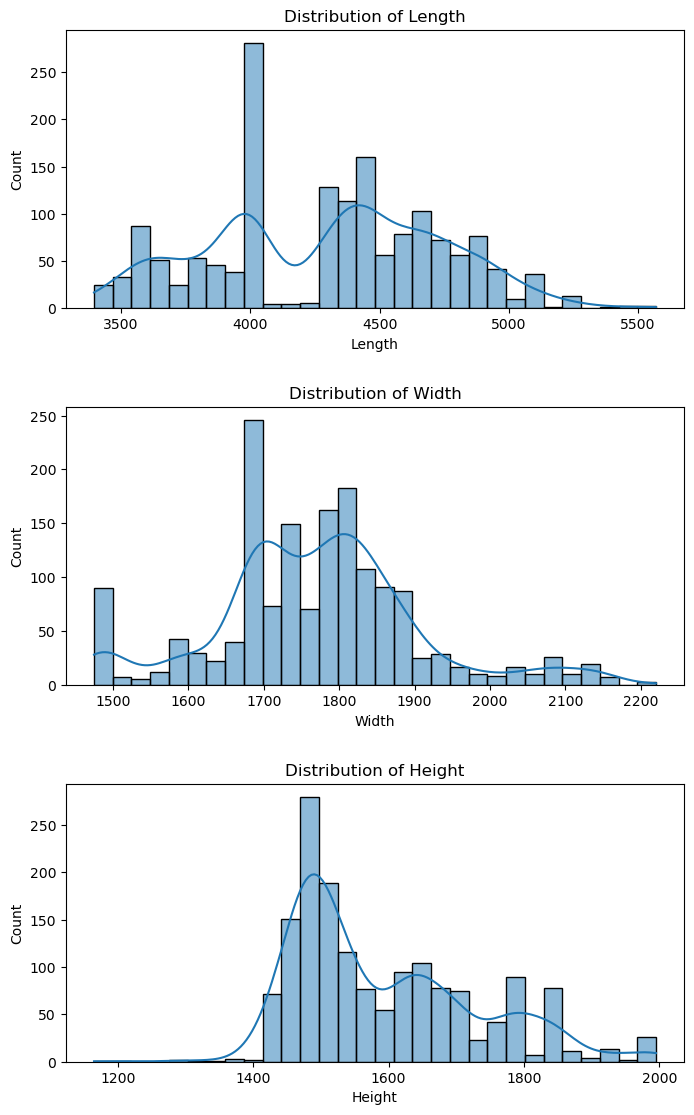

In [342]:
# Distribution of Length, Width and Height

numerical_features = ['Length', 'Width', 'Height']

# subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 4 * len(numerical_features)))
fig.tight_layout(pad=5.0)

# histplots 
for i, feature in enumerate(numerical_features):
    sns.histplot(train_dataset[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')


plt.show()

I use "median" to fill Nan values in these columns too.

In [343]:
train_dataset['Length'] = train_dataset['Length'].fillna(train_dataset.groupby(['Model', 'Transmission'])['Length'].transform('median'))
train_dataset['Width'] = train_dataset['Width'].fillna(train_dataset.groupby(['Model', 'Transmission'])['Width'].transform('median'))
train_dataset['Height'] = train_dataset['Height'].fillna(train_dataset.groupby(['Model', 'Transmission'])['Height'].transform('median'))

In [344]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain            106
Length                 39
Width                  39
Height                 39
Seating Capacity       48
Fuel Tank Capacity      0
price_category          0
Price                   0
Max Power(BHP)          0
Max Power(RPM)          0
Max Torque(Nm)          0
Max Torque(RPM)         0
dtype: int64

In [345]:
train_dataset['Length'] = train_dataset['Length'].fillna(train_dataset.groupby(['Year', 'Make'])['Length'].transform('median'))
train_dataset['Width'] = train_dataset['Width'].fillna(train_dataset.groupby(['Year', 'Make'])['Width'].transform('median'))
train_dataset['Height'] = train_dataset['Height'].fillna(train_dataset.groupby(['Year', 'Make'])['Height'].transform('median'))

In [346]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain            106
Length                  6
Width                   6
Height                  6
Seating Capacity       48
Fuel Tank Capacity      0
price_category          0
Price                   0
Max Power(BHP)          0
Max Power(RPM)          0
Max Torque(Nm)          0
Max Torque(RPM)         0
dtype: int64

In [347]:
train_dataset['Length'] = train_dataset['Length'].fillna(train_dataset.groupby(['Fuel Type', 'Drivetrain'])['Length'].transform('median'))
train_dataset['Width'] = train_dataset['Width'].fillna(train_dataset.groupby(['Fuel Type', 'Drivetrain'])['Width'].transform('median'))
train_dataset['Height'] = train_dataset['Height'].fillna(train_dataset.groupby(['Fuel Type', 'Drivetrain'])['Height'].transform('median'))

In [348]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain            106
Length                  6
Width                   6
Height                  6
Seating Capacity       48
Fuel Tank Capacity      0
price_category          0
Price                   0
Max Power(BHP)          0
Max Power(RPM)          0
Max Torque(Nm)          0
Max Torque(RPM)         0
dtype: int64

In [349]:
train_dataset['Length'] = train_dataset['Length'].fillna(train_dataset['Length'].median())
train_dataset['Width'] = train_dataset['Width'].fillna(train_dataset['Width'].median())
train_dataset['Height'] = train_dataset['Height'].fillna(train_dataset['Height'].median())

In [350]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain            106
Length                  0
Width                   0
Height                  0
Seating Capacity       48
Fuel Tank Capacity      0
price_category          0
Price                   0
Max Power(BHP)          0
Max Power(RPM)          0
Max Torque(Nm)          0
Max Torque(RPM)         0
dtype: int64

Filling Seating Capacity's missing values

Text(0.5, 1.0, 'Boxplot of Seating Capacity')

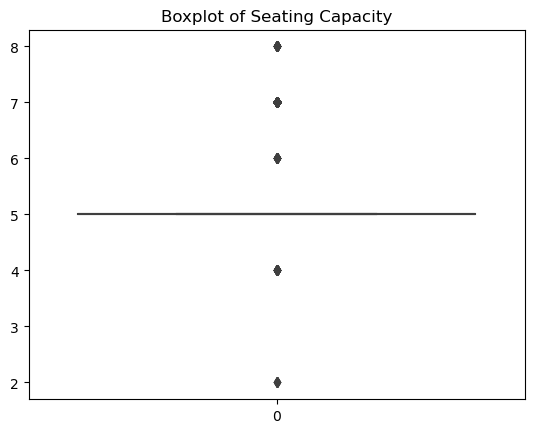

In [351]:
sns.boxplot(train_dataset['Seating Capacity'])
plt.title('Boxplot of Seating Capacity')

In [352]:
train_dataset['Seating Capacity'].value_counts().sort_values(ascending=False)

Seating Capacity
5.0    1296
7.0     220
8.0      31
4.0      29
6.0      18
2.0       5
Name: count, dtype: int64

In [353]:
train_dataset['Seating Capacity'] = train_dataset['Seating Capacity'].fillna(train_dataset.groupby(['Make', 'Transmission'])['Seating Capacity'].transform('median'))

In [354]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain            106
Length                  0
Width                   0
Height                  0
Seating Capacity        1
Fuel Tank Capacity      0
price_category          0
Price                   0
Max Power(BHP)          0
Max Power(RPM)          0
Max Torque(Nm)          0
Max Torque(RPM)         0
dtype: int64

In [355]:
train_dataset['Seating Capacity'] = train_dataset['Seating Capacity'].fillna(train_dataset.groupby(['Year', 'Fuel Type'])['Seating Capacity'].transform('median'))

In [356]:
train_dataset.isna().sum()

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                  0
Drivetrain            106
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
price_category          0
Price                   0
Max Power(BHP)          0
Max Power(RPM)          0
Max Torque(Nm)          0
Max Torque(RPM)         0
dtype: int64

Filling Drivetrain missing values
Drivetrain is a categorical feature so we use "mode" to fill them.

In [357]:
train_dataset['Drivetrain'] = train_dataset['Drivetrain'].fillna(train_dataset.groupby(['Year', 'Transmission'])['Drivetrain'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]))


In [358]:
train_dataset.isna().sum()

Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            2
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
price_category        0
Price                 0
Max Power(BHP)        0
Max Power(RPM)        0
Max Torque(Nm)        0
Max Torque(RPM)       0
dtype: int64

In [359]:
train_dataset['Drivetrain'] = train_dataset['Drivetrain'].fillna(train_dataset.groupby(['Fuel Type', 'price_category'])['Drivetrain'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]))

In [360]:
train_dataset.isna().sum()

Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            1
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
price_category        0
Price                 0
Max Power(BHP)        0
Max Power(RPM)        0
Max Torque(Nm)        0
Max Torque(RPM)       0
dtype: int64

Finally our data is clean :)

# Q4

Correlated features and create new features by them using PCA

In [361]:
# dropping price_category and Model for the reason i mentioned later
train_dataset=train_dataset.drop(['price_category', 'Model'], axis=1)

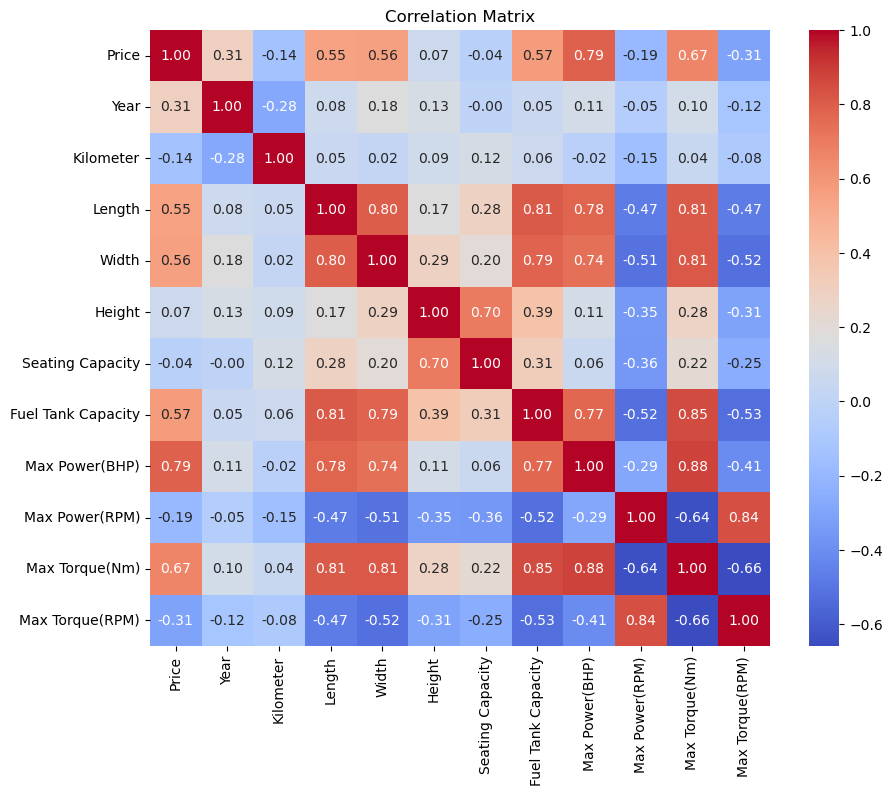

In [362]:
# Plotting correlation matrix
numerical_features = ['Price' ,'Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Max Power(BHP)', 'Max Power(RPM)', 'Max Torque(Nm)', 'Max Torque(RPM)']
correlation_matrix = train_dataset[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In heatmap(correlation matrix), the strength and direction of the correlation are represented by colors, with warmer colors (red) indicating stronger positive correlations, cooler colors (blue) indicating stronger negative correlations, and neutral colors (white) indicating no correlation. 

Highly correlated features:
'Max Power(RPM)' and 'Max Torque(RPM)' / 'Max Torque(Nm)' and 'Max Power(BHP)' / 'Max Torque(Nm)' and 'Fuel Tank Capacity' / 'Width' and 'Max Torque(Nm)' and ...

I use PCA method to create new features from correlated features and save them in a dataframe

In [363]:
#PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
numerical_features = ['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Max Power(BHP)', 'Max Power(RPM)' , 'Max Torque(Nm)', 'Max Torque(RPM)']
selected_features = train_dataset[numerical_features]

# Normalization
scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

# PCA
pca = PCA()
pca_result = pca.fit_transform(selected_features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])


print('New features by PCA:')
print(pca_df.head())


New features by PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.594920 -0.329146  0.749290 -0.435758 -0.591652  0.147341 -1.278631   
1 -3.084473  0.250972 -0.043478  0.132678 -0.717864  0.474490  0.184187   
2  1.119326  3.024726 -0.104665  0.283306 -0.987236  0.497380 -0.369564   
3 -2.482303 -0.477085 -1.393016  0.172795  0.699452 -0.040094  0.079708   
4 -2.386634 -0.231996 -0.076001  0.518611  0.081769  0.097498 -0.222116   

        PC8       PC9      PC10      PC11  
0 -1.184460  0.976903  0.561481  0.056317  
1 -0.191763  0.026857  0.166566 -0.074115  
2 -0.629262 -0.100471  0.457489  0.162725  
3  0.305018 -0.232983  0.412264 -0.029487  
4 -0.024747 -0.127033  0.274874 -0.022027  


# Q5

Encoding our categorical features by LabelEncoder

One-hot encoding is a better choice but the parameter (handle_unknown='ignore') that handle unseen data didnt work:) so i used labelencoder

In [364]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 1905 to 1473
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Year                1647 non-null   int64  
 2   Kilometer           1647 non-null   int64  
 3   Fuel Type           1647 non-null   object 
 4   Transmission        1647 non-null   object 
 5   Location            1647 non-null   object 
 6   Color               1647 non-null   object 
 7   Owner               1647 non-null   object 
 8   Seller Type         1647 non-null   object 
 9   Engine              1647 non-null   float64
 10  Drivetrain          1646 non-null   object 
 11  Length              1647 non-null   float64
 12  Width               1647 non-null   float64
 13  Height              1647 non-null   float64
 14  Seating Capacity    1647 non-null   float64
 15  Fuel Tank Capacity  1647 non-null   float64
 16  Price   

In [365]:
train_dataset

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Price,Max Power(BHP),Max Power(RPM),Max Torque(Nm),Max Torque(RPM)
1905,Mercedes-Benz,2013,52000,Petrol,Automatic,Delhi,Silver,Second,Individual,1595.0,...,4359.0,2010.0,1557.0,5.0,50.0,1150000,120.0,5000.0,200.0,1250.0
1716,Maruti Suzuki,2014,19000,Petrol,Automatic,Mumbai,Silver,Second,Individual,998.0,...,3600.0,1600.0,1560.0,5.0,35.0,345000,67.0,6000.0,90.0,3500.0
1796,Mahindra,2013,60000,Diesel,Manual,Kolkata,Red,First,Individual,1493.0,...,3985.0,1850.0,1880.0,7.0,55.0,249000,100.0,3750.0,240.0,1600.0
953,Hyundai,2021,18105,Petrol,Manual,Bangalore,Silver,First,Individual,1197.0,...,3765.0,1660.0,1520.0,5.0,43.0,765000,81.0,6000.0,114.0,4000.0
349,Maruti Suzuki,2016,45000,Petrol,Manual,Delhi,White,First,Individual,1197.0,...,3850.0,1695.0,1530.0,5.0,42.0,450000,83.0,6000.0,115.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Skoda,2018,55000,Petrol,Automatic,Pune,Grey,Second,Individual,1598.0,...,4413.0,1699.0,1466.0,5.0,55.0,900000,104.0,5200.0,153.0,3750.0
1877,Hyundai,2017,31000,Diesel,Manual,Kolkata,White,First,Individual,1582.0,...,4440.0,1729.0,1475.0,5.0,45.0,811999,126.0,4000.0,260.0,1500.0
1588,Maruti Suzuki,2015,50000,Diesel,Manual,Dehradun,Silver,Second,Individual,1248.0,...,3995.0,1695.0,1555.0,5.0,42.0,500000,74.0,4000.0,190.0,2000.0
345,Hyundai,2015,61000,Diesel,Manual,Ahmedabad,Silver,First,Individual,1396.0,...,3985.0,1734.0,1505.0,5.0,45.0,561000,89.0,4000.0,220.0,1500.0


In [366]:
from sklearn.preprocessing import LabelEncoder

 # categorical features
categorical_features = ['Make', 'Fuel Type', 'Transmission','Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain']

# LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features in the training data
for feature in categorical_features:
    train_dataset[feature] = label_encoder.fit_transform(train_dataset[feature])



# Q6

Train model

In [367]:
train_dataset.head()

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Price,Max Power(BHP),Max Power(RPM),Max Torque(Nm),Max Torque(RPM)
1905,21,2013,52000,6,0,15,14,2,2,1595.0,...,4359.0,2010.0,1557.0,5.0,50.0,1150000,120.0,5000.0,200.0,1250.0
1716,19,2014,19000,6,0,44,14,2,2,998.0,...,3600.0,1600.0,1560.0,5.0,35.0,345000,67.0,6000.0,90.0,3500.0
1796,18,2013,60000,2,1,35,13,0,2,1493.0,...,3985.0,1850.0,1880.0,7.0,55.0,249000,100.0,3750.0,240.0,1600.0
953,8,2021,18105,6,1,6,14,0,2,1197.0,...,3765.0,1660.0,1520.0,5.0,43.0,765000,81.0,6000.0,114.0,4000.0
349,19,2016,45000,6,1,15,15,0,2,1197.0,...,3850.0,1695.0,1530.0,5.0,42.0,450000,83.0,6000.0,115.0,4000.0


In [368]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import math


X = train_dataset.drop(['Price'], axis=1)
y = train_dataset['Price']


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the models
lasso_model = Lasso()
ridge_model = Ridge()


# Define the parameter grid for alpha values
param_grid = {'alpha': [0.0001 ,0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV for Lasso
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_scaled, y)

# Use GridSearchCV for Ridge
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_scaled, y)

# Get the best alpha values
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_ridge_alpha = ridge_grid.best_params_['alpha']


# Get the best models from the grid search
best_lasso_model = lasso_grid.best_estimator_
best_ridge_model = ridge_grid.best_estimator_

# Fit the best models on the entire dataset
best_lasso_model.fit(X_scaled, y)
best_ridge_model.fit(X_scaled, y)

# Make predictions
lasso_predictions = best_lasso_model.predict(X_scaled)
ridge_predictions = best_ridge_model.predict(X_scaled)

# Compute RMSE and R2 score
lasso_rmse = math.sqrt(mean_squared_error(y, lasso_predictions))
ridge_rmse = math.sqrt(mean_squared_error(y, ridge_predictions))

lasso_r2_score = r2_score(y, lasso_predictions)
ridge_r2_score = r2_score(y, ridge_predictions)

print("Best Lasso Alpha:", best_lasso_alpha)
print("Lasso RMSE:", lasso_rmse)
print("Lasso R2 Score:", lasso_r2_score)

print("\nBest Ridge Alpha:", best_ridge_alpha)
print("Ridge RMSE:", ridge_rmse)
print("Ridge R2 Score:", ridge_r2_score)


Best Lasso Alpha: 100
Lasso RMSE: 1319340.0626639512
Lasso R2 Score: 0.7016314533575845

Best Ridge Alpha: 10
Ridge RMSE: 1321399.3743583774
Ridge R2 Score: 0.7006993004140345


It seems our model can't predict Price by these features.
I used "PCA" and "Forward Selection" methods for selecting good features but it didn't word too.

I also normalized y (target) and then train the model and got a smaller error but when we convert it to real scale the error is same as here.

# Q7

RMSE and R^2 score

In [369]:
test_dataset.head()

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,price_category,Price
1122,Audi,A4 Premium Plus 40 TFSI,2022,22000,Petrol,Automatic,Delhi,White,First,Individual,...,188 bhp @ 4200 rpm,320 Nm @ 1450 rpm,FWD,4762.0,1847.0,1433.0,5.0,54.0,Medium,4150000
1521,Hyundai,Xcent S 1.1 CRDi (O),2014,81000,Diesel,Manual,Lucknow,White,First,Individual,...,71 bhp @ 4000 rpm,180 Nm @ 1750 rpm,FWD,3995.0,1660.0,1520.0,5.0,43.0,Low,390000
1918,Ford,Endeavour Titanium 3.2 4x4 AT,2017,93000,Diesel,Automatic,Ahmedabad,White,First,Individual,...,197 bhp @ 3000 rpm,470 Nm @ 1750 rpm,AWD,4892.0,1860.0,1837.0,7.0,80.0,Medium,2000000
1175,Hyundai,Verna 1.6 CRDI SX,2019,40000,Diesel,Manual,Ludhiana,White,First,Individual,...,126 bhp @ 4000 rpm,260 Nm @ 1900 rpm,FWD,4375.0,1700.0,1475.0,5.0,43.0,Low,1125000
973,Maruti Suzuki,Swift DZire ZDI AMT,2017,76000,Diesel,Automatic,Navi Mumbai,Silver,First,Individual,...,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,Low,650000


In [370]:
X_test=test_dataset.drop(['Price'], axis=1)
y_test=test_dataset['Price']

In [371]:
# Define a function that split each of 'Max Power' and 'Max Torque' columns to 2 columns
def split(df):
    if 'Max Power' in df.columns and 'Max Torque' in df.columns:
        # Split 'Max Power'
        df[['Max Power(BHP)', 'Max Power(RPM)']] = df['Max Power'].str.split('@', expand=True)
        # Strip whitespaces
        df['Max Power(BHP)'] = df['Max Power(BHP)'].str.strip()
        df['Max Power(RPM)'] = df['Max Power(RPM)'].str.strip()

        # Split 'Max Torque'
        df[['Max Torque(Nm)', 'Max Torque(RPM)']] = df['Max Torque'].str.split('@', expand=True)
        # Strip whitespaces
        df['Max Torque(Nm)'] = df['Max Torque(Nm)'].str.strip()
        df['Max Torque(RPM)'] = df['Max Torque(RPM)'].str.strip()

        df=df.drop(['Max Power', 'Max Torque'], axis=1, inplace=True)
    
    return df

In [372]:
split(X_test)

In [373]:
# Define a function to fill missing values
def fill_nan(df):
    # Fill numeric columns with median
    numeric_columns = ['Length', 'Width', 'Height', 'Max Power(BHP)', 'Max Power(RPM)',
                        'Max Torque(Nm)', 'Max Torque(RPM)', 'Engine', 'Fuel Tank Capacity', 'Seating Capacity']
    df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

    # Fill categorical column with mode
    df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode().iloc[0])

    return df


In [374]:
def to_float(df):
    # drop "Model" and "price_category" columns
    df=df.drop(['Model', 'price_category'], axis=1)

    # apply "value_to_float" function to convert string data to numerical
    df['Max Power(BHP)'] = df['Max Power(BHP)'].apply(value_to_float)
    df['Max Power(RPM)'] = df['Max Power(RPM)'].apply(value_to_float)
    df['Max Torque(Nm)'] = df['Max Torque(Nm)'].apply(value_to_float)
    df['Max Torque(RPM)'] = df['Max Torque(RPM)'].apply(value_to_float)
    df['Engine'] = df['Engine'].apply(value_to_float)

    return df


In [375]:
X_test=to_float(X_test)

In [376]:
X_test=fill_nan(X_test)

In [377]:
X_test.isna().sum()

Make                  0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Max Power(BHP)        0
Max Power(RPM)        0
Max Torque(Nm)        0
Max Torque(RPM)       0
dtype: int64

In [378]:
# LabelEncoder
categorical_features = ['Make', 'Fuel Type', 'Transmission','Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain']
for feature in categorical_features:
    X_test[feature] = label_encoder.fit_transform(X_test[feature])

In [379]:
# i know we should use "transform" for test data but in this case, my R2 score turns to s.th strange so i use "fit transform" 
X_test=scaler.fit_transform(X_test) 

# Make predictions
lasso_pred = best_lasso_model.predict(X_test)
ridge_pred = best_ridge_model.predict(X_test)

# Compute RMSE and R2 score
lasso_rmse_test = math.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse_test = math.sqrt(mean_squared_error(y_test, ridge_pred))

lasso_r2_score_test = r2_score(y_test, lasso_pred)
ridge_r2_score_test = r2_score(y_test, ridge_pred)


print("Lasso RMSE on Test data:", lasso_rmse_test)
print("Lasso R2 Score on Test data:", lasso_r2_score_test)


print("Ridge RMSE on Test data:", ridge_rmse_test)
print("Ridge R2 Score on Test data:", ridge_r2_score_test)

Lasso RMSE on Test data: 1611229.4824499113
Lasso R2 Score on Test data: 0.5619607342241664
Ridge RMSE on Test data: 1598636.492318167
Ridge R2 Score on Test data: 0.568781199535575


# Q8

5 fold Crossvalidation

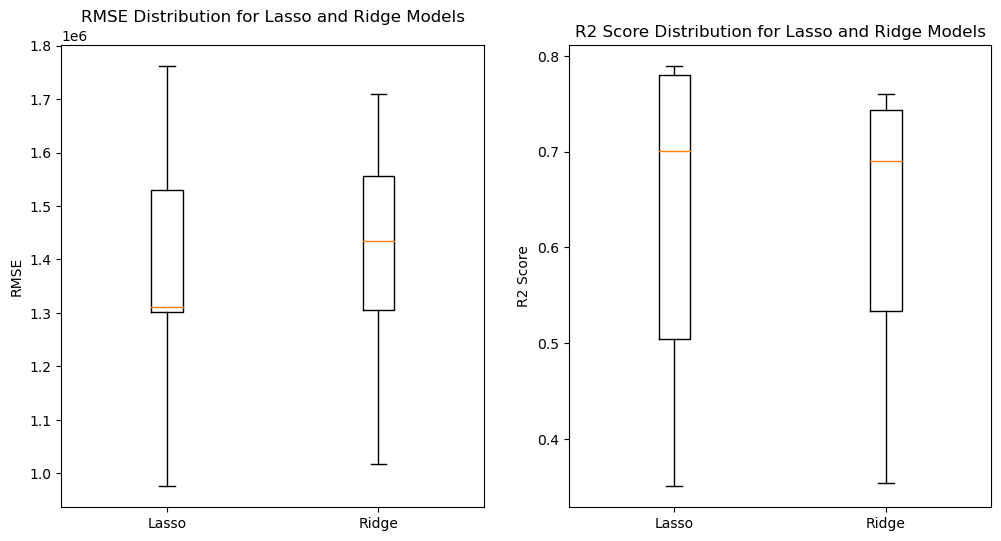

In [380]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


X = train_dataset.drop(['Price'], axis=1)
y = train_dataset['Price']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the models
lasso_model = Lasso()
ridge_model = Ridge()

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Create KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R2 score for each fold
lasso_rmse_list = []
ridge_rmse_list = []
lasso_r2_list = []
ridge_r2_list = []

# Iterate through each fold
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Use GridSearchCV for Lasso
    lasso_grid = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    lasso_grid.fit(X_train, y_train)
    best_lasso_model = lasso_grid.best_estimator_

    # Use GridSearchCV for Ridge
    ridge_grid = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    ridge_grid.fit(X_train, y_train)
    best_ridge_model = ridge_grid.best_estimator_

    # Make predictions
    lasso_predictions = best_lasso_model.predict(X_test)
    ridge_predictions = best_ridge_model.predict(X_test)

    # Compute RMSE for each fold
    lasso_rmse_fold = np.sqrt(mean_squared_error(y_test, lasso_predictions))
    ridge_rmse_fold = np.sqrt(mean_squared_error(y_test, ridge_predictions))

    # Compute R2 score for each fold
    lasso_r2_fold = r2_score(y_test, lasso_predictions)
    ridge_r2_fold = r2_score(y_test, ridge_predictions)

    # Store RMSE and R2 score for each fold
    lasso_rmse_list.append(lasso_rmse_fold)
    ridge_rmse_list.append(ridge_rmse_fold)
    lasso_r2_list.append(lasso_r2_fold)
    ridge_r2_list.append(ridge_r2_fold)

# Box plots for RMSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([lasso_rmse_list, ridge_rmse_list], labels=['Lasso', 'Ridge'])
plt.title('RMSE Distribution for Lasso and Ridge Models')
plt.ylabel('RMSE')

# Box plots for R2 scores
plt.subplot(1, 2, 2)
plt.boxplot([lasso_r2_list, ridge_r2_list], labels=['Lasso', 'Ridge'])
plt.title('R2 Score Distribution for Lasso and Ridge Models')
plt.ylabel('R2 Score')

plt.show()
